In [94]:
import numpy as np
import pandas as pd
import os 
import time
import librosa
import librosa.display
from matplotlib import pyplot as plt
from matplotlib.pyplot import specgram
import random

directory = os.getcwd()
print(directory)

I:\Miscs\Challenge\Voice\src


In [2]:

def get_immediate_subdirectories(a_dir):
    return [name for name in os.listdir(a_dir)
            if os.path.isdir(os.path.join(a_dir, name))]



In [33]:

#directory = os.getcwd()
# Unzipped data is put in the following path
#data_path = directory + '\\Voice\\data\\unzipped\\train'

# Create a file with file description and labels (gender and accent)
df = pd.DataFrame()
data_path = "../data/unzipped/train/"
size_train = []
subdirs = get_immediate_subdirectories(data_path)
for subdir in subdirs:
    filenames = os.listdir(data_path + "\\" + subdir)
    gender = subdir.split("_")[0]
    accent = subdir.split("_")[1]
    df1 = pd.DataFrame({
            'Filename' : filenames,
            'Foldername' : subdir,
            'Gender' : gender,
            'Accent' : accent

        })
    size_train.append(df1.shape[0])
    #print(df1.head())
    df = df.append(df1, ignore_index=True)
    

    
print(df.head())
df.to_csv("description.csv")
    
print(size_train)

                                            Filename      Foldername  Gender  \
0  22da883214754878af2101120bbfb2ee_-xxgeOf7Erg_1...  female_central  female   
1  22da883214754878af2101120bbfb2ee_-xxgeOf7Erg_1...  female_central  female   
2  22da883214754878af2101120bbfb2ee_0-zjMqbAdEA_2...  female_central  female   
3  22da883214754878af2101120bbfb2ee_0-zjMqbAdEA_2...  female_central  female   
4  22da883214754878af2101120bbfb2ee_0-zjMqbAdEA_2...  female_central  female   

    Accent  
0  central  
1  central  
2  central  
3  central  
4  central  
[1546, 2364, 2801, 4079, 3430, 6258]


Female Central


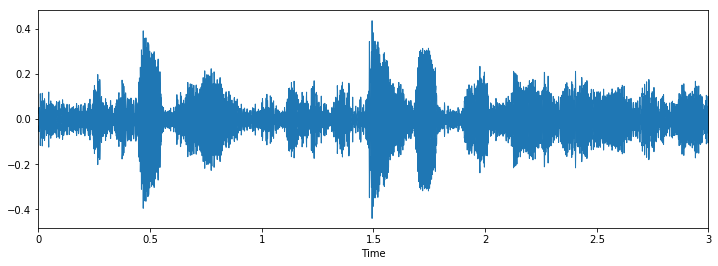

In [14]:
data, sampling_rate = librosa.load('../data/unzipped/train/female_central/22da883214754878af2101120bbfb2ee_-xxgeOf7Erg_128-135_0.wav')

plt.figure(figsize=(12, 4))
print("Female Central")
librosa.display.waveplot(data, sr=sampling_rate)


4408
923
922    22da883214754878af2101120bbfb2ee_onHGXKnfvv0_1355-1386_0.wav
Name: Filename, dtype: object
[[  1.8187226   -3.8589284  -38.95793    ... -27.084751    -4.381488
    6.337579  ]
 [  0.89976794  -4.3744903  -19.414396   ... -19.764778    -1.6823239
    7.0933824 ]
 [ -0.14985833  -8.451389   -21.584465   ... -20.23575      0.21750027
    8.083399  ]
 ...
 [-39.837624   -43.234955   -43.234955   ... -43.234955   -43.234955
  -36.774487  ]
 [-39.837997   -43.234955   -43.234955   ... -43.234955   -43.234955
  -36.774834  ]
 [-39.83836    -43.234955   -43.234955   ... -43.234955   -43.234955
  -36.775093  ]]
[[-34.946327 -40.623978 -75.72298  ... -63.8498   -41.146538 -30.427471]
 [-35.86528  -41.139538 -56.179443 ... -56.529827 -38.447372 -29.671667]
 [-36.914906 -45.21644  -58.349514 ... -57.0008   -36.54755  -28.68165 ]
 ...
 [-76.60268  -80.       -80.       ... -80.       -80.       -73.539536]
 [-76.60304  -80.       -80.       ... -80.       -80.       -73.53989 ]
 [-7

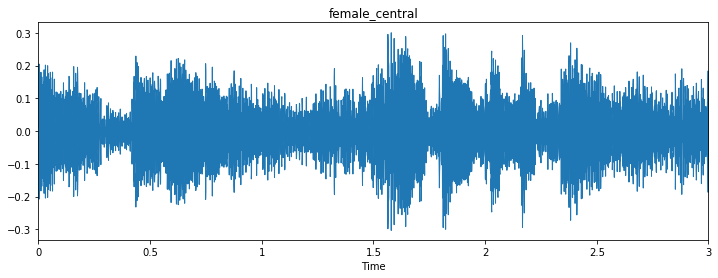

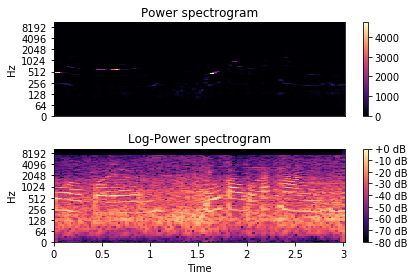

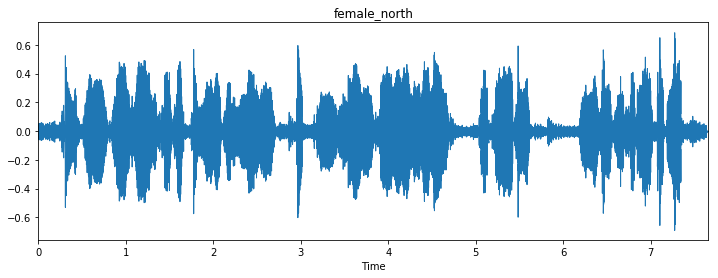

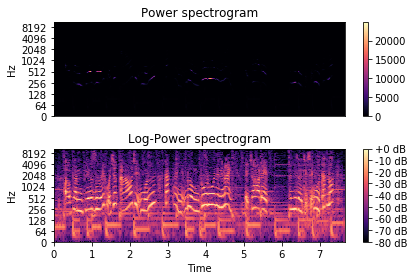

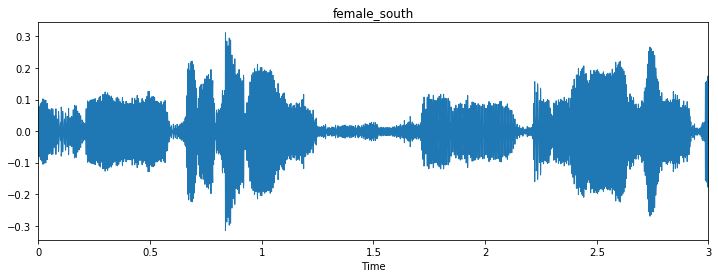

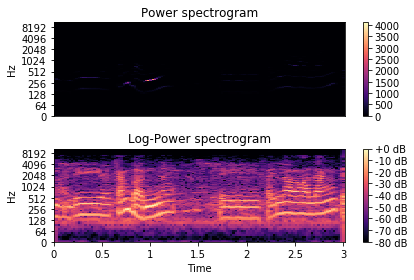

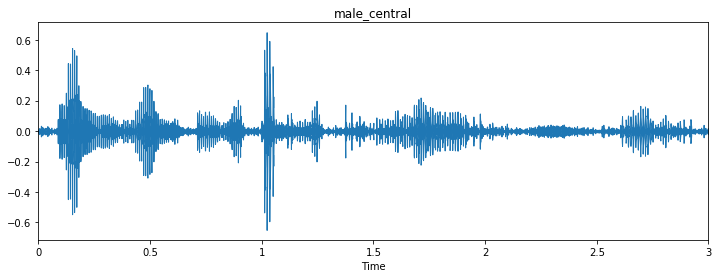

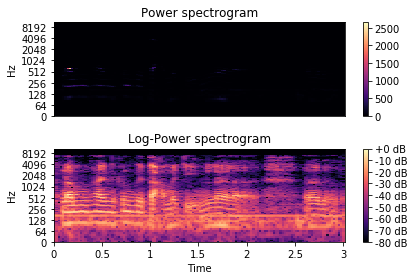

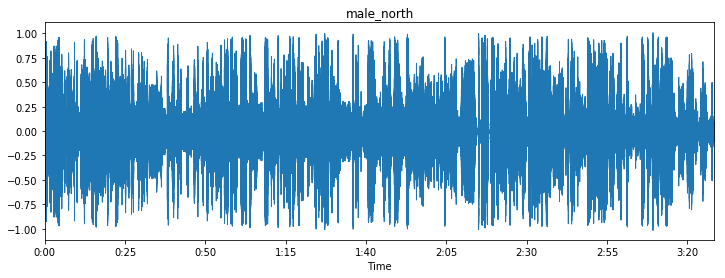

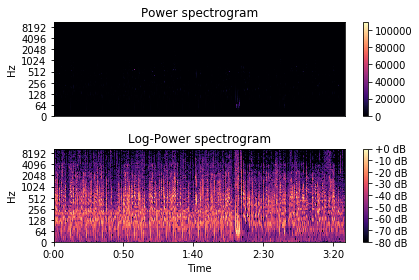

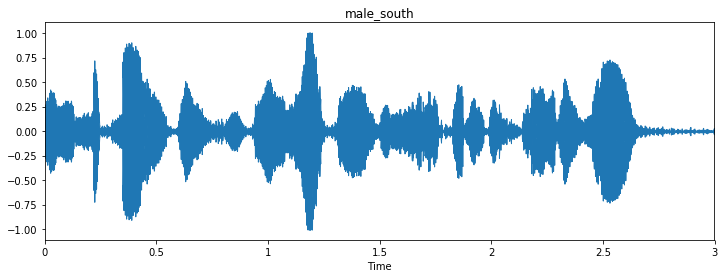

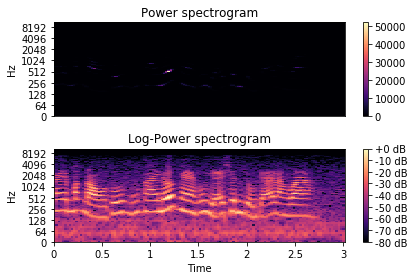

In [104]:
# Display a representative soundwave for each type of voice 
# Soundwave 
# Power-spectrogram 
# Log-power spectrogram
index = np.random.choice(df.shape[0])
print(index)
ind = 0
data_path = "../data/unzipped/train/"
for subdir in subdirs:
    index = np.random.choice(size_train[ind])
    print(index)
    filenames = os.listdir(data_path + "\\" + subdir)
    gender = subdir.split("_")[0]
    accent = subdir.split("_")[1]
    df1 = pd.DataFrame({
            'Filename' : filenames,
            'Foldername' : subdir,
            'Gender' : gender,
            'Accent' : accent

        })
    
    #print(subdir)
    print(df1[index - 1:index]['Filename'])
    dat_path = '../data/unzipped/train/' + subdir + '/' + df1[index - 1:index]['Filename'].max()
    #print(dat_path)
    data, sampling_rate = librosa.load(path = dat_path)
    
    plt.figure(figsize=(12, 4))
    plt.title(subdir)
    librosa.display.waveplot(data, sr=sampling_rate, )
   
    # log-amplitude
    
    S = np.abs(librosa.stft(data))
    print(librosa.power_to_db(S**2))

    print(librosa.power_to_db(S**2, ref=np.max))
    
    plt.figure()
    plt.subplot(2, 1, 1)
    librosa.display.specshow(S**2, sr=sampling_rate, y_axis='log')
    plt.colorbar()
    plt.title('Power spectrogram')
    plt.subplot(2, 1, 2)
    librosa.display.specshow(librosa.power_to_db(S**2, ref=np.max), sr=sampling_rate, y_axis='log', x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Log-Power spectrogram')
    plt.tight_layout()
    

In [97]:
help(specgram)

Help on function specgram in module matplotlib.pyplot:

specgram(x, NFFT=None, Fs=None, Fc=None, detrend=None, window=None, noverlap=None, cmap=None, xextent=None, pad_to=None, sides=None, scale_by_freq=None, mode=None, scale=None, vmin=None, vmax=None, hold=None, data=None, **kwargs)
    Plot a spectrogram.
    
    Call signature::
    
      specgram(x, NFFT=256, Fs=2, Fc=0, detrend=mlab.detrend_none,
               window=mlab.window_hanning, noverlap=128,
               cmap=None, xextent=None, pad_to=None, sides='default',
               scale_by_freq=None, mode='default', scale='default',
               **kwargs)
    
    Compute and plot a spectrogram of data in *x*.  Data are split into
    *NFFT* length segments and the spectrum of each section is
    computed.  The windowing function *window* is applied to each
    segment, and the amount of overlap of each segment is
    specified with *noverlap*. The spectrogram is plotted as a colormap
    (using imshow).
    
    Paramet

63

20478